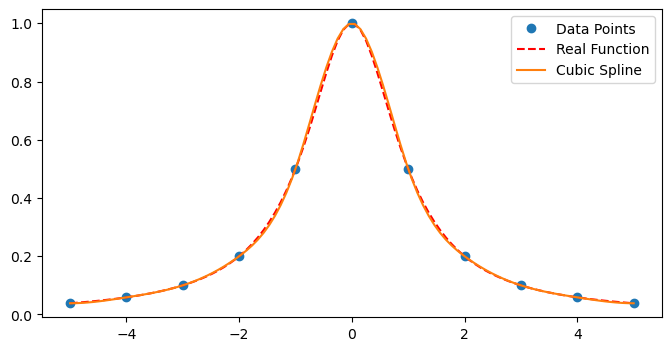

In [1]:
import numpy as np  
from scipy.interpolate import CubicSpline  
import matplotlib.pyplot as plt  

def Runge(x):
    return 1.0 / (1.0 + x**2)

# 准备数据点  
n = 11
x = np.linspace(-5, 5, n)
y = Runge(x)

# D1 边界条件
start_derivative = 10.0 / 26.0**2 
end_derivative = -start_derivative

# 创建逐段三次样条对象  
cs = CubicSpline(x, y, bc_type=('clamped'))  
  
# 生成用于评估样条的细粒度x值  
x_new = np.linspace(-5, 5, 100)  
  
# 评估样条  
y_new = cs(x_new)

# 真解
y_real = Runge(x_new)

  
# 绘制结果  
plt.figure(figsize=(8, 4))  
plt.plot(x, y, 'o', label='Data Points')  
plt.plot(x_new, y_real, 'r--', label='Real Function')  
plt.plot(x_new, y_new, label='Cubic Spline')  
plt.legend()
plt.show()

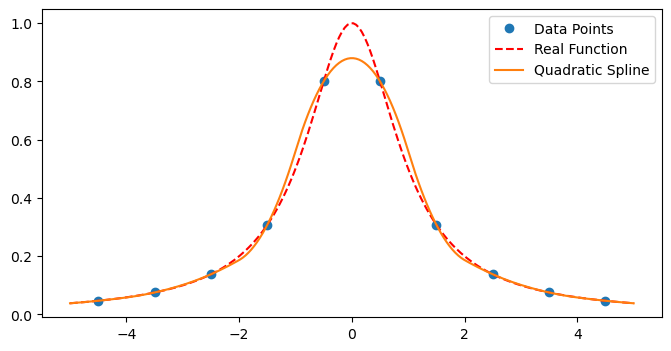

In [2]:
def Bspline(n, i, x):
    if (n == 0):
        return (x > i - 1) * (x <= i) * 1.0
    else:
        return (x - i + 1) / n * Bspline(n - 1, i, x) + (i + n - x) / n * Bspline(n - 1, i + 1, x)

# 准备数据点  
n = 10
x = np.zeros(n)
A = np.zeros((n,n))

for i in range(n):
    x[i] = i+1-11.0/2.0
    if i==0:
        A[i,i] = 5
        A[i,i+1] = 1
    else:
        if i==n-1:
            A[i,i] = 5
            A[i,i-1] = 1
        else:
            A[i,i] = 6
            A[i,i-1] = 1
            A[i,i+1] = 1
y = Runge(x)

b = np.zeros(n)    
for i in range(n):
    if i==0:
        b[i] = 8*Runge(-4.5)-2*Runge(-5)
    else:
        if i==n-1:
            b[i] = 8*Runge(4.5)-2*Runge(5)
        else:
            b[i] = 8*Runge(-4.5+i)

a = np.linalg.solve(A,b)

def spline(x):
    Sum = 0
    for i in range(n+2):
        if i==0:
            Sum = Sum+(2*Runge(-5)-a[0])*Bspline(2,-6,x)
        else:
            if i==n+1:
                Sum = Sum+(2*Runge(5)-a[n-1])*Bspline(2,5,x)
            else:
                Sum = Sum+a[i-1]*Bspline(2,i-6,x)
    return Sum

# 生成用于评估样条的细粒度x值  
x_new = np.linspace(-5, 5, 200)  
  
# 评估样条  
y_new = spline(x_new)

# 真解
y_real = Runge(x_new)
  
# 绘制结果  
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_new, y_real, 'r--', label='Real Function')  
plt.plot(x_new, y_new, label='Quadratic Spline')  
plt.legend()  
plt.show()